In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [6]:
df = pd.read_csv('adjacency_matrix1.csv', index_col='Id')
df_cluster = df.copy()
df_cluster.head()

,T1566,T1047,T1053,T1059,T1106,T1204,T1543,T1547,T1027,T1036,...,T1005,T1056,T1113,T1560,T1071,T1090,T1105,T1132,T1573,T1041
Id,,,,,,,,,,,,,,,,,,,,,
T1566,0.0,0,0,0.185022,0,0.255507,0,0.004405,0.123348,0.008811,...,0.0,0.0,0.0,0,0.022026,0,0.132159,0,0,0
T1047,0.0,0,0,0.061674,0,0.000000,0,0.000000,0.004405,0.000000,...,0.0,0.0,0.0,0,0.000000,0,0.000000,0,0,0
T1053,0.0,0,0,0.233480,0,0.000000,0,0.000000,0.167401,0.039648,...,0.0,0.0,0.0,0,0.132159,0,0.158590,0,0,0
T1059,0.0,0,0,0.000000,0,0.000000,0,0.000000,0.903084,0.000000,...,0.0,0.0,0.0,0,0.766520,0,1.000000,0,0,0
T1106,0.0,0,0,0.229075,0,0.000000,0,0.000000,0.259912,0.083700,...,0.0,0.0,0.0,0,0.149780,0,0.215859,0,0,0


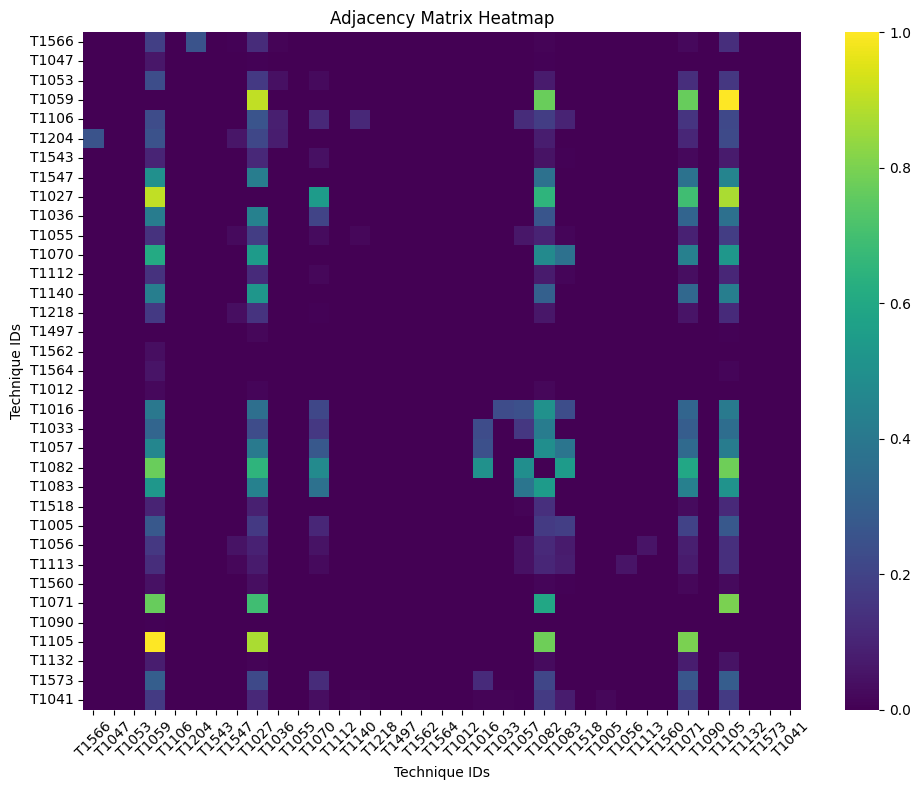

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df, cmap='viridis')  # Adjust the colormap as needed
plt.title('Adjacency Matrix Heatmap')
plt.xlabel('Technique IDs')
plt.ylabel('Technique IDs')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [28]:
sorted_values = sorted(df.values.flatten(), reverse=True)
top_10_values = sorted_values[:10]
chokepoints = df[df.isin(top_10_values)]
for row_label, row in chokepoints.iterrows():
    for col_label, value in row.items():
        if not pd.isnull(value):  # Check if the value is not NaN (i.e., among the top 10 values)
            print(f"Edge: {row_label} - {col_label}, Count: {value}")

Edge: T1059 - T1027, Count: 0.9030837
Edge: T1059 - T1105, Count: 1.0
Edge: T1027 - T1059, Count: 0.9030837
Edge: T1027 - T1105, Count: 0.872246696
Edge: T1082 - T1105, Count: 0.779735683
Edge: T1071 - T1105, Count: 0.797356828
Edge: T1105 - T1059, Count: 1.0
Edge: T1105 - T1027, Count: 0.872246696
Edge: T1105 - T1082, Count: 0.779735683
Edge: T1105 - T1071, Count: 0.797356828


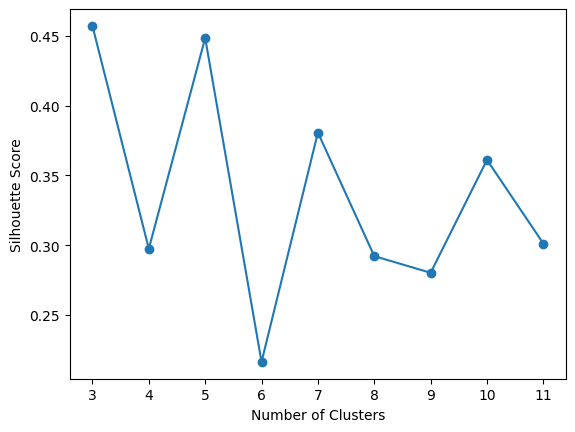

In [7]:
# Apply K-means clustering
k_values = [3,4,5,6,7,8,9,10,11]
silhouette_scores = []
for k in k_values:
    model = KMeans(n_clusters=k)
    df_cluster['kmeans'] = model.fit_predict(df)
    silhouette_avg = silhouette_score(df, df_cluster['kmeans'])
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


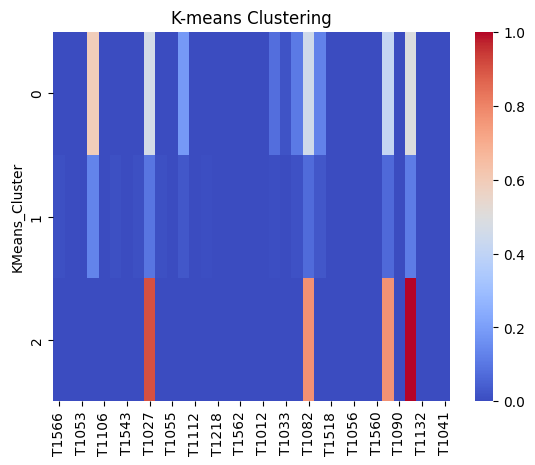

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)  # You can choose the number of clusters
kmeans.fit(df)
df['KMeans_Cluster'] = kmeans.labels_

silhouette_kmeans = silhouette_score(df, kmeans.labels_)
# Visualize the clusters using a heatmap
sns.heatmap(df.groupby('KMeans_Cluster').mean(), cmap='coolwarm')
plt.title('K-means Clustering')
plt.show()

df = df.drop(columns='KMeans_Cluster')

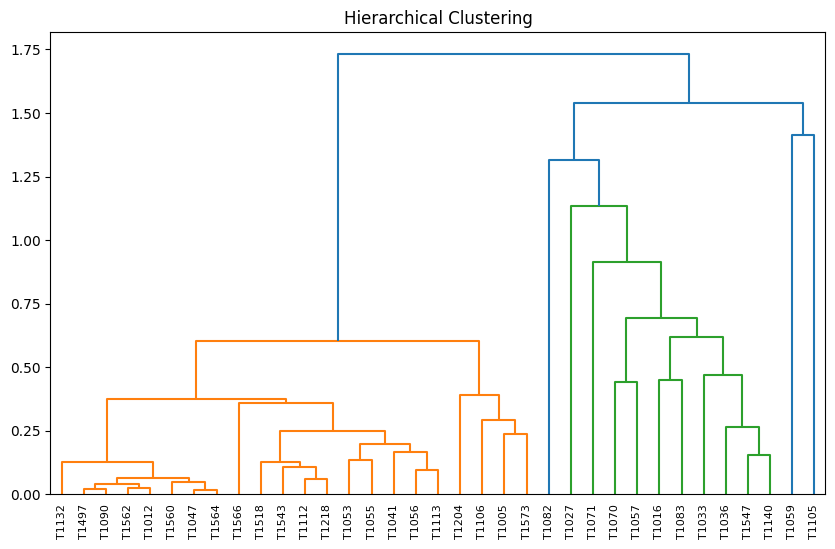

In [9]:
# Apply hierarchical clustering
linkage = hierarchy.linkage(df, method='complete', metric='euclidean')

# Visualize the clusters using a dendrogram
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(linkage, labels=df.index, leaf_rotation=90)
plt.title('Hierarchical Clustering')
plt.show()

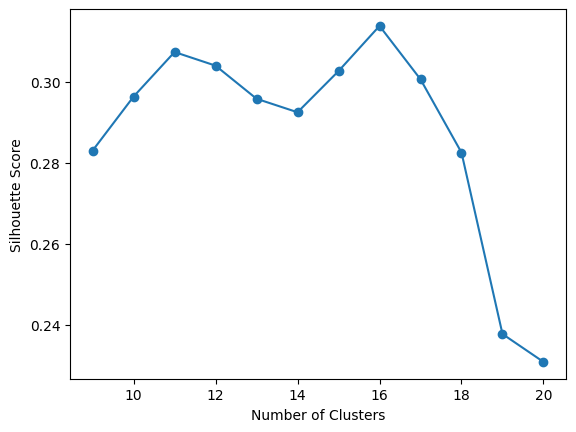

In [10]:
k_values = [9,10,11,12,13,14,15,16,17,18,19,20]
silhouette_scores = []
for k in k_values:
    model = AgglomerativeClustering(n_clusters=k)
    df_cluster['agg'] = model.fit_predict(df)
    silhouette_avg = silhouette_score(df, df_cluster['agg'])
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [19]:
# Perform Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=16)
agg_labels = agg.fit_predict(df)
silhouette_agg = silhouette_score(df, agg_labels)

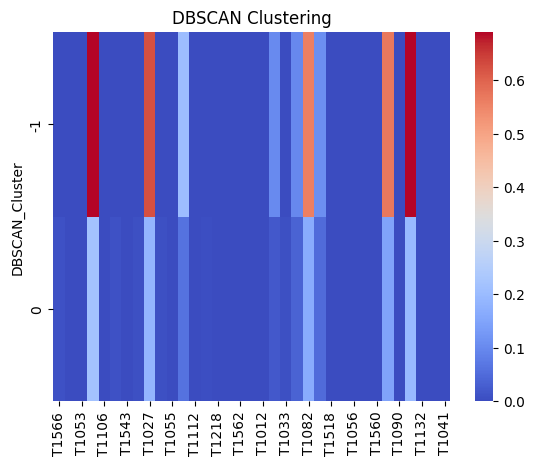

In [17]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df)
df['DBSCAN_Cluster'] = dbscan_labels
#silhouette_dbscan = silhouette_score(df, dbscan_labels[dbscan_labels != -1])
# Visualize the clusters using a heatmap
sns.heatmap(df.groupby('DBSCAN_Cluster').mean(), cmap='coolwarm')
plt.title('DBSCAN Clustering')
plt.show()
df = df.drop(columns='DBSCAN_Cluster')

In [20]:
# Compare silhouette scores
print("Silhouette Score - KMeans:", silhouette_kmeans)
print("Silhouette Score - Agglomerative Clustering:", silhouette_agg)
#print("Silhouette Score - DBSCAN:", silhouette_dbscan)

Silhouette Score - KMeans: 0.6652322569247743
Silhouette Score - Agglomerative Clustering: 0.3138638552324883


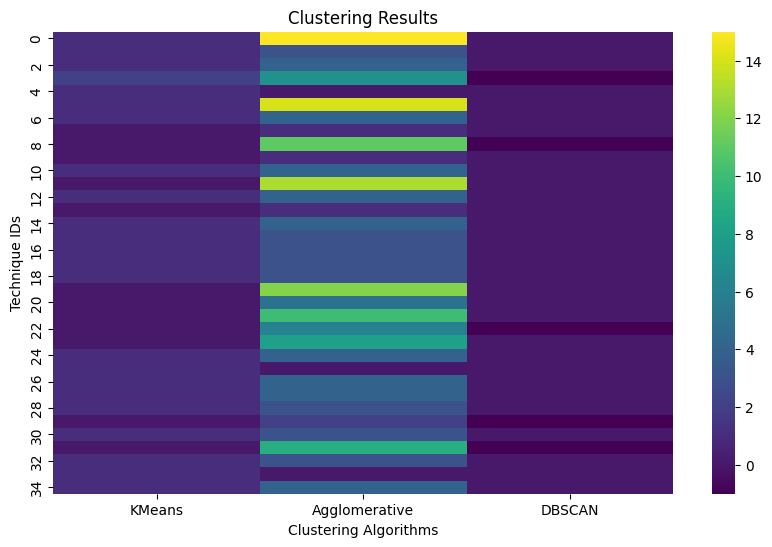

In [21]:

# Create a DataFrame with the clustering labels
clustered_df = pd.DataFrame({'KMeans': kmeans.labels_,
                             'Agglomerative': agg_labels,
                             'DBSCAN': dbscan_labels})

# Plot the clustered DataFrame as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(clustered_df, cmap='viridis')
plt.title('Clustering Results')
plt.xlabel('Clustering Algorithms')
plt.ylabel('Technique IDs')
plt.show()